Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

Loading dataset

In [ ]:
ipl = pd.read_csv('/content/ipl_data.csv')
print(ipl.head())

   mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222 

Data Pre-Processing

In [ ]:
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [ ]:
X = df.drop(['total'], axis =1)
y = df['total']

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Defining the neural network

In [ ]:
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])
huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)

Training the model

In [ ]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 [==============================] - 9s 10ms/step - loss: 32.5925 - val_loss: 22.2322
Epoch 2/50
832/832 [==============================] - 7s 8ms/step - loss: 22.3497 - val_loss: 22.3524
Epoch 3/50
832/832 [==============================] - 6s 7ms/step - loss: 22.2800 - val_loss: 22.2279
Epoch 4/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2599 - val_loss: 22.1490
Epoch 5/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2218 - val_loss: 21.8462
Epoch 6/50
832/832 [==============================] - 6s 7ms/step - loss: 22.1750 - val_loss: 22.1494
Epoch 7/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1281 - val_loss: 21.8449
Epoch 8/50
832/832 [==============================] - 5s 6ms/step - loss: 22.0636 - val_loss: 21.7953
Epoch 9/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1409 - val_loss: 21.7894
Epoch 10/50
832/832 [==============================] - 4s 5ms/step - loss: 22.055

<Axes: >

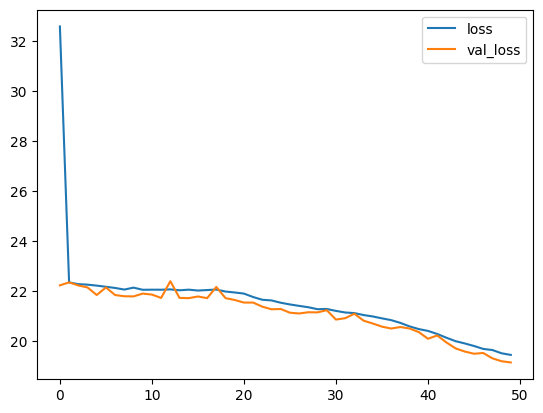

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [ ]:
predictions = model.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")
from sklearn.metrics import r2_score


r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

range_y = np.max(y_test) - np.min(y_test)
normalized_rmse = rmse / range_y
print(f"Normalized RMSE: {normalized_rmse:.2f}")
print(f"R-squared: {r2:.2f}")


713/713 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 19.636834648883386
Mean Squared Error (MSE): 717.7591390305715
R-squared: 0.14895296613052833
Root Mean Squared Error (RMSE): 26.791027211187174
Normalized RMSE: 0.14
R-squared: 0.15


In [ ]:
# Assuming model is already trained and X_train_scaled, y_train are used for training
predictions_train = model.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=False)
r2_train = r2_score(y_train, predictions_train)

print("Training Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R-squared: {r2_train}")


1663/1663 [==============================] - 4s 2ms/step
Training Set Metrics:
Mean Absolute Error (MAE): 19.735901299312285
Mean Squared Error (MSE): 728.9964583695498
Root Mean Squared Error (RMSE): 26.999934414171264
R-squared: 0.15275705906310844


In [ ]:
# Assuming X_test_scaled, y_test are used for testing
predictions_test = model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=False)
r2_test = r2_score(y_test, predictions_test)

print("\nTesting Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R-squared: {r2_test}")


713/713 [==============================] - 1s 2ms/step

Testing Set Metrics:
Mean Absolute Error (MAE): 19.636834648883386
Mean Squared Error (MSE): 717.7591390305715
Root Mean Squared Error (RMSE): 26.791027211187174
R-squared: 0.14895296613052833


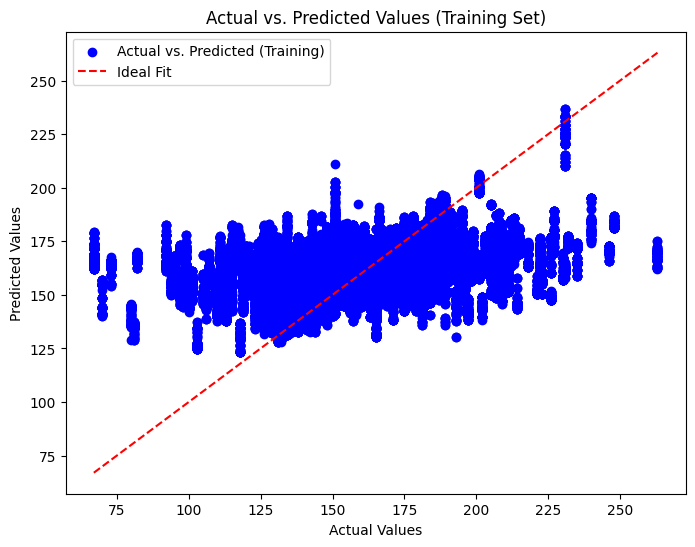

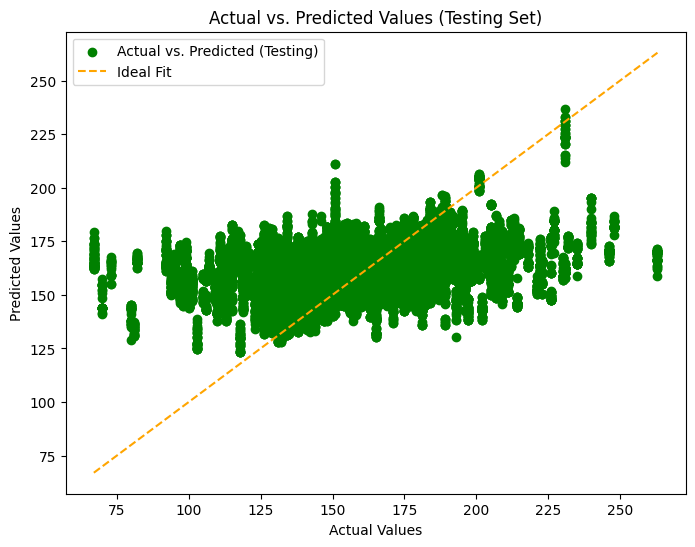

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Ideal Fit')
plt.title('Actual vs. Predicted Values (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='orange', label='Ideal Fit')
plt.title('Actual vs. Predicted Values (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Creating the widget

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()



        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)

        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)


In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()